In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Get Familiar With the Data
First. I'd like to understand the data, columns, distributions and etc.

The data consists of 891 samples of Titanic Passsengers, each with different features:
* `Pclass` - ticket class. An ordinal variable with three categories: 1, 2, 3.
* `Name` - name of passenger.
* `Sex` - is the passenger Male or Female.
* `Age` - the age of the passenger during the Titanic disaster - numeric variable.
* `SibSp` - # of siblings / spouses aboard the Titanic - numeric feature.
* `Parch` - # of parents / children aboard the Titanic - numeric feature.
* `Ticket` - ticket number - a String.
* `Fare` - Passenger fare - numeric feature.
* `Cabin` - Cabin number
* `Embarked` - the port the passenger has ambarked on - a caterogical feature with three categories (Q, C, S),

The target feature is `Survived` - classify whther a passenger survived.

Let's see the distribution of the target variable:

In [4]:
train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In the training set, about 62% did not survive and 38% did survive. To start, I will address this dataset as a balanced one.

What are the survival rates, given certain features?



In [5]:
# Sex

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

women = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_women = sum(women)/len(women)

print("% of men who survived:", rate_women)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [6]:
# Pclass
class_1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_class1 = sum(class_1)/len(class_1)

print("% of class 1 survivors:", rate_class1)

class_2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_class2 = sum(class_2)/len(class_2)

print("% of class 2 survivors:", rate_class2)

class_3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_class3 = sum(class_3)/len(class_3)

print("% of class 3 survivors:", rate_class3)

% of class 1 survivors: 0.6296296296296297
% of class 2 survivors: 0.47282608695652173
% of class 3 survivors: 0.24236252545824846


In [7]:
# SibSp value
train_data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [8]:
for i in [0, 1, 2, 3, 4, 5, 8]:
    classSp = train_data.loc[train_data.SibSp == i]["Survived"]
    rate_classSp = sum(classSp)/len(classSp)

    print(f"% of class {i} SP survivors: {rate_classSp}")

% of class 0 SP survivors: 0.34539473684210525
% of class 1 SP survivors: 0.5358851674641149
% of class 2 SP survivors: 0.4642857142857143
% of class 3 SP survivors: 0.25
% of class 4 SP survivors: 0.16666666666666666
% of class 5 SP survivors: 0.0
% of class 8 SP survivors: 0.0


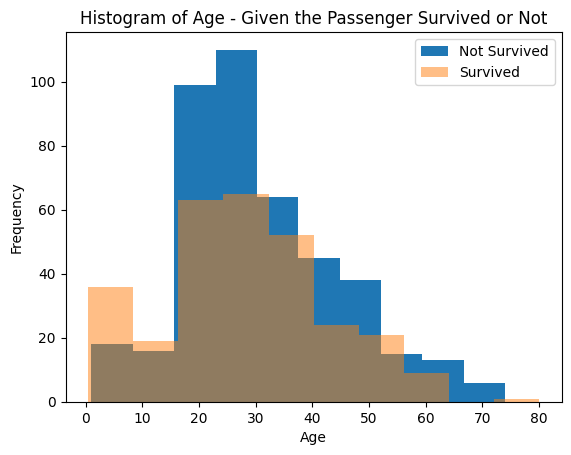

In [9]:
# Age
import matplotlib.pyplot as plt
age_0 = train_data[train_data["Survived"] == 0]["Age"]
age_1 = train_data[train_data["Survived"] == 1]["Age"]

plt.hist(age_0, label = 'Not Survived')
plt.hist(age_1, label = 'Survived', alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age - Given the Passenger Survived or Not")
plt.legend()
plt.show()

In [10]:
age_0.describe(), age_1.describe()

(count    424.000000
 mean      30.626179
 std       14.172110
 min        1.000000
 25%       21.000000
 50%       28.000000
 75%       39.000000
 max       74.000000
 Name: Age, dtype: float64,
 count    290.000000
 mean      28.343690
 std       14.950952
 min        0.420000
 25%       19.000000
 50%       28.000000
 75%       36.000000
 max       80.000000
 Name: Age, dtype: float64)

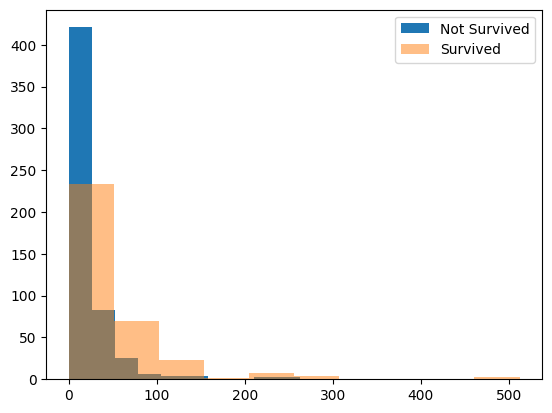

In [11]:
# Fare
fare_0 = train_data[train_data["Survived"] == 0]["Fare"]
fare_1 = train_data[train_data["Survived"] == 1]["Fare"]

plt.hist(fare_0, label = 'Not Survived')
plt.hist(fare_1, label = 'Survived', alpha = 0.5)
plt.legend()
plt.show()# 

In [12]:
train_data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [13]:
# Parch
for i in range(7):
    classParch = train_data.loc[train_data.Parch == i]["Survived"]
    rate_classParch = sum(classParch)/len(classParch)

    print(f"% of class {i} Parch survivors: {rate_classParch}")

% of class 0 Parch survivors: 0.34365781710914456
% of class 1 Parch survivors: 0.5508474576271186
% of class 2 Parch survivors: 0.5
% of class 3 Parch survivors: 0.6
% of class 4 Parch survivors: 0.0
% of class 5 Parch survivors: 0.2
% of class 6 Parch survivors: 0.0


In [14]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
# Embark
ports = ['S', 'C', 'Q']
for port in ports:
    classPort = train_data.loc[train_data.Embarked == port]["Survived"]
    rate_classPort = sum(classPort)/len(classPort)

    print(f"% of class {port} Parch survivors: {rate_classPort}")

% of class S Parch survivors: 0.33695652173913043
% of class C Parch survivors: 0.5535714285714286
% of class Q Parch survivors: 0.38961038961038963


We can see that the features that seperate the data the most are `Sex`, `Pclass`, `SibSp` and `Embarked`.

Let's try and build a model based on these.

First, I'd like to know if there are missing values. and how man:

In [16]:
# Find missing values
missing_values = train_data.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total missing values: 866


We can see that the `Cabin` feature has many missing values (most of it) - so, we will not use it for our models, since impituing it might be difficult due to the nature of the feature. 

Another column that has many missing values is `Age`. We can impute the missing values with the mean, median or most frequent value. In this case, I will use the mean value.

We can also see that embarked has two missing values as well. Since it is only two samples, I think I will just delete them.

In [17]:
train_data = train_data.dropna(subset = ['Embarked'])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
# Impute Age with the mean
mean_age = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].fillna(mean_age)
train_data

/tmp/ipykernel_19/3808453026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'] = train_data['Age'].fillna(mean_age)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [19]:
train_data = train_data.drop('Cabin', axis = 1)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [20]:
test_data = test_data.drop('Cabin', axis = 1)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [21]:
train_data.drop(columns = ['Ticket', 'Name'], inplace = True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.642093,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [22]:
test_data.drop(columns = ['Ticket', 'Name'], inplace = True)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


### Check For Matching Categories

One of the things I notices is that `Parch` has categories in the test set that do not appear in the train set (such as `Parch == 9`).

I want to see 


In [23]:
condition = train_data['Parch'] > 2
# Update values greater than 2 to 'other'
train_data.loc[condition, 'Parch'] = 'other'

# Display the modified dataframe
train_data

/tmp/ipykernel_19/1635078295.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[condition, 'Parch'] = 'other'


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.642093,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [24]:
train_data.Parch.value_counts()

Parch
0        676
1        118
2         80
other     15
Name: count, dtype: int64

In [25]:
condition = test_data['Parch'] > 2
# Update values greater than 2 to 'other'
test_data.loc[condition, 'Parch'] = 'other'

# Display the modified dataframe
test_data

/tmp/ipykernel_19/3489208727.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_data.loc[condition, 'Parch'] = 'other'


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [26]:
test_data.Parch.value_counts()

Parch
0        324
1         52
2         33
other      9
Name: count, dtype: int64

## Fit Models

For this classification I will try a few models:
* Decision Tree
* Random Forest
* Logistic Regression
* XGBoost

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
y = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(data = train_data, columns = ['Parch', 'Sex', 'Pclass', 'SibSp', 'Embarked'], dtype = int)
X['Age'] = train_data['Age']
X['Fare'] = train_data['Fare']
X.drop(columns = ['Survived', 'PassengerId'], inplace = True)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((711, 21), (178, 21), (711,), (178,))

In [29]:
X_train

,Age,Fare,Parch_0,Parch_1,Parch_2,Parch_other,Sex_female,Sex_male,Pclass_1,Pclass_2,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
799,30.000000,24.1500,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
318,31.000000,164.8667,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
538,29.642093,14.5000,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
800,34.000000,13.0000,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
687,19.000000,10.1708,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,17.000000,8.6625,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
839,29.642093,29.7000,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
59,11.000000,46.9000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
797,31.000000,8.6833,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)
predictions = rf.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
print("Random Forrest Accuracy:", accuracy)

Random Forrest Accuracy: 0.848314606741573


In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
predictions = lr.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print("Logistic Refression Accuracy:", accuracy)

Logistic Refression Accuracy: 0.8146067415730337


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# XGBoost
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
predictions = bst.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.7584269662921348


In [33]:
X_test = pd.get_dummies(data = test_data, columns = ['Parch', 'Sex', 'Pclass', 'SibSp', 'Embarked'], dtype = int)
X_test['Age'] = test_data['Age']
X_test['Fare'] = test_data['Fare']
X_test.drop(columns = ['PassengerId'], inplace = True)
print(X_test.columns), print(X.columns)

Index(['Age', 'Fare', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_other',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['Age', 'Fare', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_other',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


(None, None)

In [34]:
X_test

,Age,Fare,Parch_0,Parch_1,Parch_2,Parch_other,Sex_female,Sex_male,Pclass_1,Pclass_2,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,62.0,9.6875,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,8.0500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
414,39.0,108.9000,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
415,38.5,7.2500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
416,NaN,8.0500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [35]:
# Find missing values
missing_values = test_data.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64
Total missing values: 87


In [36]:
mean_age = train_data['Age'].mean()
X_test['Age'] = X_test['Age'].fillna(mean_age)
X_test

,Age,Fare,Parch_0,Parch_1,Parch_2,Parch_other,Sex_female,Sex_male,Pclass_1,Pclass_2,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
0,34.500000,7.8292,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,47.000000,7.0000,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,62.000000,9.6875,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
3,27.000000,8.6625,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,22.000000,12.2875,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.642093,8.0500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
414,39.000000,108.9000,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
415,38.500000,7.2500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
416,29.642093,8.0500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [37]:
# Find missing values
missing_values = X_test.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
Age            0
Fare           1
Parch_0        0
Parch_1        0
Parch_2        0
Parch_other    0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
SibSp_0        0
SibSp_1        0
SibSp_2        0
SibSp_3        0
SibSp_4        0
SibSp_5        0
SibSp_8        0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
Total missing values: 1


In [38]:
mean_fare = train_data['Fare'].mean()
X_test['Fare'] = X_test['Fare'].fillna(mean_fare)
X_test

,Age,Fare,Parch_0,Parch_1,Parch_2,Parch_other,Sex_female,Sex_male,Pclass_1,Pclass_2,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
0,34.500000,7.8292,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,47.000000,7.0000,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,62.000000,9.6875,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
3,27.000000,8.6625,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,22.000000,12.2875,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.642093,8.0500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
414,39.000000,108.9000,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
415,38.500000,7.2500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
416,29.642093,8.0500,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [39]:
# Find missing values
missing_values = X_test.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
Age            0
Fare           0
Parch_0        0
Parch_1        0
Parch_2        0
Parch_other    0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
SibSp_0        0
SibSp_1        0
SibSp_2        0
SibSp_3        0
SibSp_4        0
SibSp_5        0
SibSp_8        0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
Total missing values: 0


In [40]:
predictions = rf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
